# **Previsão do Cargo Ideal**

## **1. Introdução**
Neste projeto, construirei um modelo de aprendizado de máquina para prever o cargo ideal na área de dados com base no estudo *State of Data Brazil 2022*. O problema é abordado como uma tarefa de classificação supervisionada, onde o modelo aprenderá a partir de dados rotulados para determinar a posição mais adequada para um candidato com base em diversos atributos.  

Utilizarei o seguinte pipeline baseado no processo KDD (Knowledge Discovery in Databases):  

1. **Seleção** – Identificar e selecionar as instâncias e atributos mais relevantes para a análise.  
2. **Pré-processamento** – Tratar dados ausentes, incorretos ou inconsistentes para melhorar a qualidade geral.  
3. **Transformação** – Converter os dados para um formato compatível com as técnicas de modelagem escolhidas.  
4. **Mineração de Dados** – Treinar e comparar modelos de classificação para prever o cargo ideal.  
5. **Avaliação** – Avaliar o desempenho dos modelos e analisar os resultados para selecionar a melhor abordagem.  

Neste notebook, realizarei a análise exploratória dos dados (EDA), cobrindo as etapas 1 a 3 do pipeline acima. O principal objetivo é extrair insights que revelem padrões entre diferentes perfis de candidatos a partir das variáveis disponíveis. Mesmo antes de construir o modelo final, essa análise fornecerá informações úteis sobre tendências de adequação a cargos na área de dados. Além disso, explicarei cada etapa em detalhes, justificando as decisões tomadas ao longo do processo.

## **2. Configurações Iniciais**

### **2.1 Importando as Bibliotecas**

In [153]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, ConfusionMatrixDisplay, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

## **2.2 Compeendendo a Base da Dados**
- O dataset foi coletado do kaggle: https://www.kaggle.com/datasets/datahackers/state-of-data-2022
- Mais detalhes no site da pesquisa: https://www.stateofdata.com.br
- Os dados da pesquisa foram segmentados em oito partes, sendo as mais adequadas para nossas previsões as partes 1, 2 e 4, que correspondem, respectivamente, 
    - Dados demográficos, 
    - Dados sobre a carreira  
    - Conhecimentos na área de dados.

# **3. Preocesso KDD**
A seguir, vamos explorar a base de dados a fim de gerar um modelo que concentre o conhecimento extraído que seja necessário para a execução da tarefa de classificação para encontrar qual o *cargo* ideal para um candidato a uma vaga na área de dados. O processo KDD ajuda a organizar esse processo e a garantir um mínimo de procedimentos imprescendíveis para a exploração de qualquer tarefa de extração de conhecimento. Dessa forma, vamos utilizar suas primeiras 3 etapas para a análise exploratória dos dados.

## **3.1 Seleção**
A seleção trata da escolha do conjunto de dados alvo e escolha de subconjuntos de variáveis
ou amostras na qual a descoberta de conhecimento será performada.

In [154]:
# Importando a base de dados
df = pd.read_csv('../base/State_of_data_2022.csv')

# Função para filtrar colunas
def filtrar_colunas(df):
    colunas_desejadas = [
        "('P1_a ', 'Idade')", "('P1_b ', 'Genero')", "('P1_c ', 'Cor/raca/etnia')", "('P1_d ', 'PCD')", "('P1_g ', 'vive_no_brasil')", "('P1_i ', 'Estado onde mora')",
        "('P1_l ', 'Nivel de Ensino')", "('P1_m ', 'Área de Formação')", "('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')", "('P4_f ', 'Entre as linguagens listadas abaixo, qual é a sua preferida?')",
        "('P4_g ', 'Quais dos bancos de dados/fontes de dados listados abaixo você utiliza no trabalho?')", "('P4_h ', 'Dentre as opções listadas, qual sua Cloud preferida?')", "('P2_f ', 'Cargo Atual')"
    ]
    return df[colunas_desejadas]

# Aplicando a função
df = filtrar_colunas(df)

# Renomeando as colunas
mapeamento_colunas = {
    "('P1_a ', 'Idade')": 'idade',
    "('P1_b ', 'Genero')": 'genero',
    "('P1_c ', 'Cor/raca/etnia')": 'etnia',
    "('P1_d ', 'PCD')": 'pcd',
    "('P1_g ', 'vive_no_brasil')": 'vive_no_brasil',
    "('P1_i ', 'Estado onde mora')": 'estado_moradia',
    "('P1_l ', 'Nivel de Ensino')": 'nivel_ensino',
    "('P1_m ', 'Área de Formação')": 'formacao',
    "('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')": 'tempo_experiencia_dados',
    "('P4_f ', 'Entre as linguagens listadas abaixo, qual é a sua preferida?')": 'linguagens_preferidas',
    "('P4_g ', 'Quais dos bancos de dados/fontes de dados listados abaixo você utiliza no trabalho?')": 'bancos_de_dados',
    "('P4_h ', 'Dentre as opções listadas, qual sua Cloud preferida?')": 'cloud_preferida',
    "('P2_f ', 'Cargo Atual')": 'cargo'
}

df.rename(columns=mapeamento_colunas, inplace=True)
df.head()

,idade,genero,etnia,pcd,vive_no_brasil,estado_moradia,nivel_ensino,formacao,tempo_experiencia_dados,linguagens_preferidas,bancos_de_dados,cloud_preferida,cargo
0,39.0,Masculino,Parda,Não,True,Distrito Federal (DF),Pós-graduação,Computação / Engenharia de Software / Sistemas...,de 1 a 2 anos,R,"PostgreSQL, Oracle, MySQL, SQL SERVER",Amazon Web Services (AWS),DBA/Administrador de Banco de Dados
1,32.0,Masculino,Parda,Não,True,Pará (PA),Graduação/Bacharelado,Outras Engenharias,de 3 a 4 anos,NaN,NaN,NaN,NaN
2,53.0,Masculino,Branca,Não,True,Distrito Federal (DF),Pós-graduação,Computação / Engenharia de Software / Sistemas...,de 3 a 4 anos,Python,"PostgreSQL, MySQL, Oracle, DB2",Amazon Web Services (AWS),Desenvolvedor/ Engenheiro de Software/ Analist...
3,27.0,Masculino,Branca,Não,True,Minas Gerais (MG),Doutorado ou Phd,Estatística/ Matemática / Matemática Computaci...,de 4 a 6 anos,Python,Google BigQuery,Não sei opinar,Cientista de Dados/Data Scientist
4,46.0,Feminino,Branca,Não,True,Pará (PA),Pós-graduação,Computação / Engenharia de Software / Sistemas...,Não tenho experiência na área de dados,Python,Microsoft Access,Amazon Web Services (AWS),Desenvolvedor/ Engenheiro de Software/ Analist...


In [155]:
print(f'O dataset tem {df.shape[0]} linhas e {df.shape[1]} colunas')

O dataset tem 4271 linhas e 13 colunas


In [156]:
df.pcd.value_counts()

pcd
Não                     4198
Sim                       54
Prefiro não informar      19
Name: count, dtype: int64

In [157]:
# Dropando a coluna 'pcd'
df.drop('pcd', axis=1, inplace=True)

## **3.2 Pré-processamento**
O pré-processamento trata da remoção de ruído e manipulação de dados ausentes e discrepantes. \
Aqui serão abordadas as tarefas de remoção de dados ausentes, e remoção de outiliers.

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4271 entries, 0 to 4270
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   idade                    4197 non-null   float64
 1   genero                   4262 non-null   object 
 2   etnia                    4271 non-null   object 
 3   vive_no_brasil           4271 non-null   bool   
 4   estado_moradia           4156 non-null   object 
 5   nivel_ensino             4271 non-null   object 
 6   formacao                 4149 non-null   object 
 7   tempo_experiencia_dados  3694 non-null   object 
 8   linguagens_preferidas    2979 non-null   object 
 9   bancos_de_dados          2978 non-null   object 
 10  cloud_preferida          2981 non-null   object 
 11  cargo                    2981 non-null   object 
dtypes: bool(1), float64(1), object(10)
memory usage: 371.3+ KB


In [159]:
# Verificando os valores nulos 
df.isna().sum() / df.shape[0]

idade                      0.017326
genero                     0.002107
etnia                      0.000000
vive_no_brasil             0.000000
estado_moradia             0.026926
nivel_ensino               0.000000
formacao                   0.028565
tempo_experiencia_dados    0.135097
linguagens_preferidas      0.302505
bancos_de_dados            0.302739
cloud_preferida            0.302037
cargo                      0.302037
dtype: float64

- **Observação**  
    - As colunas *linguagens_preferidas*, *bancos_de_dados*, *cloud_preferida* e *cargo* têm 30% das linhas com dados nulos;
    - A coluna *tempo_experiencia_dados* tem 13% da dados faltantes
    - As colunas *formacao* e *estado_moradia* estão com 2% de dados nulos;
    - E 1% de *idade* está faltante e 0.2% de *genero* está nulo.

Então, devemos definir uma estratégia de tratamento, que pode incluir a remoção dessas linhas, a substituição por valores padrão ou a imputação com base em padrões identificados nos dados disponíveis. A escolha dependerá da distribuição dos valores e do impacto na qualidade do modelo.

### **3.2.1 Remoção dos nulos da idade**

In [160]:
# Verificando as média e mediana da idade
print(f'Média de idade: {df.idade.mean()}')
print(f'Mediana de idade: {df.idade.median()}')


Média de idade: 31.169168453657374
Mediana de idade: 30.0


Como a média e a mediana da idade estão próximas podemos trocar os valores nulos pela mediana. 

In [161]:
# Trocando pela mediana os valores nulos da idade
df.idade.fillna(df.idade.median(), inplace=True)

### **3.2.2 Remoção dos nulos de gênero**

In [162]:
# Vendo os valores únicos da coluna genero
df.genero.unique()

array(['Masculino', 'Feminino', nan, 'Prefiro não informar'], dtype=object)

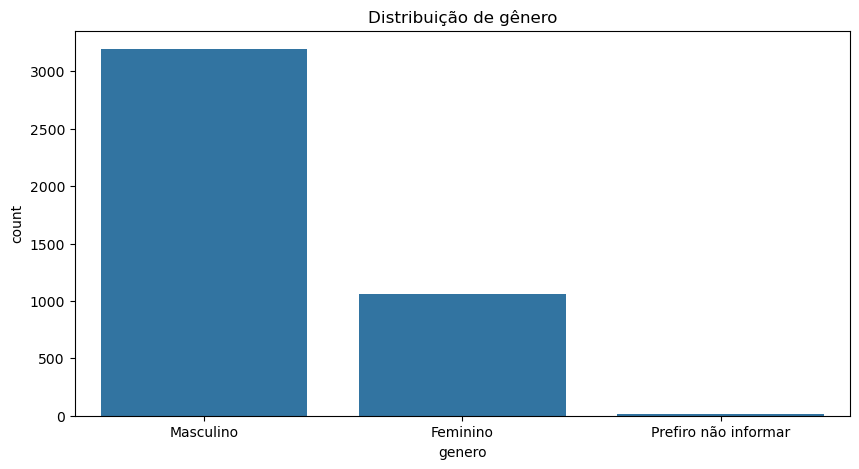

In [163]:
# Grafico de barras para a coluna genero
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='genero')
plt.title('Distribuição de gênero')
plt.show()

Como os dados faltantes na coluna *gênero* representam menos de 1%, podemos substituí-los por "Prefiro não informar".

In [164]:
# Substituindo os valores nulos da coluna genero
df.genero.fillna('Prefiro não informar', inplace=True)

### **3.2.3 Remoção dos nulos de estado moradia**

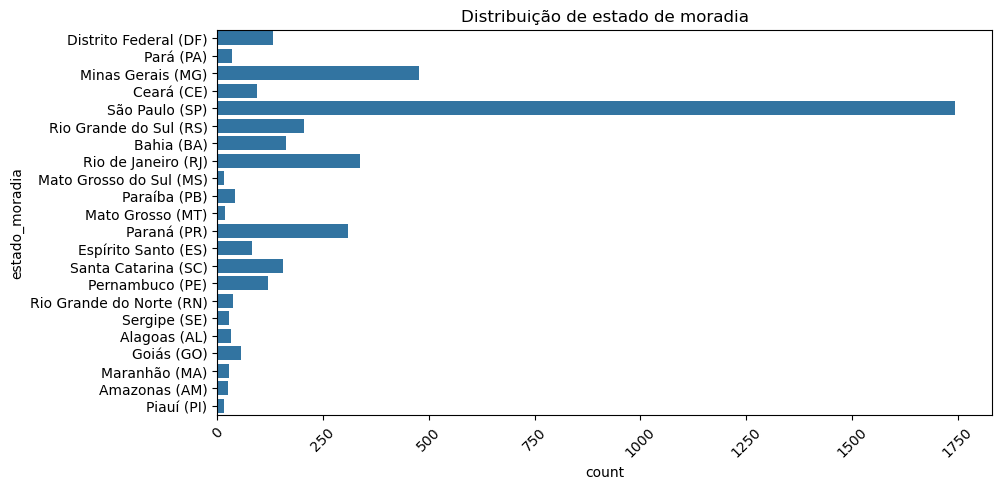

In [165]:
# Grafico de barras para a coluna estado_moradia
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='estado_moradia')
plt.title('Distribuição de estado de moradia')
plt.xticks(rotation=45)
plt.show()

Como a quantidade de valores nulos na coluna é insignificante, a melhor abordagem é trocar os nulos pela moda da coluna, que no caso seria São Paulo.

In [166]:
# Substituindo os valores nulos da coluna estado_moradia
df.estado_moradia.fillna('São Paulo (SP)', inplace=True)

### **3.2.4 Remoção dos nulos da formação**

In [167]:
# valores únicos da coluna nivel_ensino
df.formacao.value_counts()

formacao
Computação / Engenharia de Software / Sistemas de Informação/ TI          1543
Outras Engenharias                                                         941
Economia/ Administração / Contabilidade / Finanças/ Negócios               641
Estatística/ Matemática / Matemática Computacional/ Ciências Atuariais     405
Outra opção                                                                200
Marketing / Publicidade / Comunicação / Jornalismo                         122
Química / Física                                                           112
Ciências Biológicas/ Farmácia/ Medicina/ Área da Saúde                     111
Ciências Sociais                                                            74
Name: count, dtype: int64

A mesma abordagem será aplicada para tratar os valores nulos na coluna *formacao*, já que a taxa de ausência é de apenas 2%.

In [168]:
# Substituindo os valores nulos da coluna formacao
df.formacao.fillna('Computação / Engenharia de Software / Sistemas de Informação/ TI', inplace=True)

### **3.2.5 Remoção dos nulos do tempo de experiencia**

In [169]:
# valores únicos da coluna tempo_experiencia_dados
df.tempo_experiencia_dados.value_counts()

tempo_experiencia_dados
de 1 a 2 anos                             980
de 3 a 4 anos                             711
Menos de 1 ano                            596
de 4 a 6 anos                             522
Mais de 10 anos                           403
de 7 a 10 anos                            294
Não tenho experiência na área de dados    188
Name: count, dtype: int64

Como a quantidade de valores nulos na coluna não é insignificante, a melhor abordagem é criar uma nova categoria, "Não informado". Preencher os valores ausentes com a moda da coluna poderia introduzir um viés no modelo, afetando a qualidade das previsões.

In [170]:
# Substituindo os valores nulos da coluna tempo_experiencia_dados
df.tempo_experiencia_dados.fillna('Não informado', inplace=True)

### **3.2.5 Remoção dos nulos das linguagens preferidas, bancos de dados, cloud preferida e cargo**       

In [171]:
# Dados onde a linguagem preferida ou bancos_de_dados ou cloud_preferida ou cargo são nulos
df_nulos = df[df.linguagens_preferidas.isna() | df.bancos_de_dados.isna() | df.cloud_preferida.isna() | df.cargo.isna()]

# Vendos os dados onde a linguagem preferida é nula
df_nulos.head()

,idade,genero,etnia,vive_no_brasil,estado_moradia,nivel_ensino,formacao,tempo_experiencia_dados,linguagens_preferidas,bancos_de_dados,cloud_preferida,cargo
1,32.0,Masculino,Parda,True,Pará (PA),Graduação/Bacharelado,Outras Engenharias,de 3 a 4 anos,NaN,NaN,NaN,NaN
12,31.0,Masculino,Branca,True,São Paulo (SP),Doutorado ou Phd,Outras Engenharias,Não informado,NaN,NaN,NaN,NaN
16,31.0,Masculino,Parda,True,Paraíba (PB),Doutorado ou Phd,Estatística/ Matemática / Matemática Computaci...,de 1 a 2 anos,NaN,NaN,NaN,NaN
17,29.0,Masculino,Branca,True,Mato Grosso (MT),Mestrado,Estatística/ Matemática / Matemática Computaci...,de 7 a 10 anos,NaN,NaN,NaN,NaN
20,37.0,Masculino,Branca,True,São Paulo (SP),Pós-graduação,Outras Engenharias,de 4 a 6 anos,NaN,NaN,NaN,NaN


In [172]:
# Vendo quantos % dos dados são nulos
df_nulos.shape[0] / df.shape[0]

0.30273940529150084

Como as quatro colunas possuem **30% de valores nulos** e a contagem total dos valores ausentes é a mesma, isso indica que **as mesmas linhas** possuem esses dados faltantes. Isso sugere que esses registros podem estar incompletos de forma significativa, dificultando a imputação de valores confiáveis.  

Se houvesse apenas uma ou duas colunas com valores nulos, poderíamos tentar substituições baseadas em padrões dos dados. No entanto, como as quatro colunas possuem a mesma distribuição de valores ausentes, significa que um terço do dataset está com informações incompletas nessas variáveis.  

Dado esse cenário, a **melhor abordagem é remover essas linhas**, mesmo que isso signifique perder **30% do dataset**. Manter registros com muitos valores ausentes pode introduzir ruído e prejudicar a qualidade do modelo, pois a imputação nesse caso poderia ser artificial e enviesada.  

In [173]:
# removendo os dados nulos
df.dropna(inplace=True) 
df.head()

,idade,genero,etnia,vive_no_brasil,estado_moradia,nivel_ensino,formacao,tempo_experiencia_dados,linguagens_preferidas,bancos_de_dados,cloud_preferida,cargo
0,39.0,Masculino,Parda,True,Distrito Federal (DF),Pós-graduação,Computação / Engenharia de Software / Sistemas...,de 1 a 2 anos,R,"PostgreSQL, Oracle, MySQL, SQL SERVER",Amazon Web Services (AWS),DBA/Administrador de Banco de Dados
2,53.0,Masculino,Branca,True,Distrito Federal (DF),Pós-graduação,Computação / Engenharia de Software / Sistemas...,de 3 a 4 anos,Python,"PostgreSQL, MySQL, Oracle, DB2",Amazon Web Services (AWS),Desenvolvedor/ Engenheiro de Software/ Analist...
3,27.0,Masculino,Branca,True,Minas Gerais (MG),Doutorado ou Phd,Estatística/ Matemática / Matemática Computaci...,de 4 a 6 anos,Python,Google BigQuery,Não sei opinar,Cientista de Dados/Data Scientist
4,46.0,Feminino,Branca,True,Pará (PA),Pós-graduação,Computação / Engenharia de Software / Sistemas...,Não tenho experiência na área de dados,Python,Microsoft Access,Amazon Web Services (AWS),Desenvolvedor/ Engenheiro de Software/ Analist...
5,32.0,Feminino,Parda,True,Ceará (CE),Pós-graduação,Ciências Biológicas/ Farmácia/ Medicina/ Área ...,Não tenho experiência na área de dados,Python,Google BigQuery,Google Cloud (GCP),Professor


## **3.2 Transformção**
A transformação trata do destaque dos atributos que melhor representam os dados para a tarefa
de descoberta de conhecimento, através de redução de dimensionalidade ou formatação dos
dados para entrada em algoritmos de processamento.

## **3.2.1 Valores Únicos por Coluna**
Vamos fazer uma contagem de valores únicos em cada coluna do DataFrame e exibir os resultados em um DataFrame ordenado. Essa análise é útil para entender a cardinalidade de cada coluna e identificar possíveis problemas, como atributos com alta cardinalidade ou colunas com um único valor.

In [174]:
counts_data = {
    "count": [df[column].nunique() for column in df.columns],
    "type": [df[column].dtype for column in df.columns]
}

df_counts = pd.DataFrame(counts_data, index=df.columns)
df_counts = df_counts.sort_values(by="count", ascending=True)
df_counts

,count,type
vive_no_brasil,2,bool
genero,3,object
cloud_preferida,5,object
etnia,7,object
nivel_ensino,7,object
tempo_experiencia_dados,7,object
formacao,9,object
cargo,18,object
estado_moradia,22,object
linguagens_preferidas,36,object


## **3.2.2 Agregando e Removendo Categorias**
Aqui vamos agrupar diferentes categorias em categorias mais gerais ou iremos remover categorias com pouca parição e seriam irrelevantes para a análise.

In [176]:
df['bancos_de_dados'].value_counts()

bancos_de_dados
Google BigQuery                                                                                    227
SQL SERVER                                                                                         202
MySQL                                                                                              116
Databricks                                                                                          71
PostgreSQL                                                                                          69
                                                                                                  ... 
Não trabalho com banco diretamente                                                                   1
S3, SQL SERVER, Hive, Presto, Google BigQuery                                                        1
S3, Redis, PostgreSQL, SQL SERVER, Amazon Aurora ou RDS, Databricks, MySQL, Amazon Athena, Hive      1
MySQL, SAP                                               

In [177]:
# Colocando a coluna 'bancos_de_dados' como string
df['bancos_de_dados'] = df['bancos_de_dados'].astype(str)

# Colocando a coluna 'bancos_de_dados' minuscula
df['bancos_de_dados'] = df['bancos_de_dados'].str.lower()

# Pegando só a primeira opção de banco de dados
df['bancos_de_dados'] = df['bancos_de_dados'].str.split(',').str[0]

df['bancos_de_dados'].value_counts()
 

bancos_de_dados
sql server                470
google bigquery           408
mysql                     308
postgresql                252
databricks                225
                         ... 
azure data lake             1
não reconheço nenhum        1
receita                     1
denodo                      1
não trabalho com dados      1
Name: count, Length: 130, dtype: int64

In [178]:
vc = df['bancos_de_dados'].value_counts()
vc_filtrado = vc[vc > 1]
print(vc_filtrado)

bancos_de_dados
sql server                470
google bigquery           408
mysql                     308
postgresql                252
databricks                225
oracle                    193
s3                        149
amazon athena              83
amazon redshift            83
microsoft access           74
sap hana                   69
mongodb                    69
hive                       68
snowflake                  56
sqlite                     50
nenhum                     37
amazon aurora ou rds       33
db2                        26
elaticsearch               24
presto                     22
excel                      22
dynamodb                   19
mariadb                    18
firebase                   18
google firestore           12
redis                      10
splunk                     10
não utilizo                 8
hbase                       7
cassandra                   7
sybase                      6
datomic                     6
nenhuma                 

In [185]:
substituir_por_nenhum = [
    "não atuo na área ainda", "nao utilizo", "nenhum acima", 
    "não utilizo nenhum", "não usamos", "não sei", 
    "não uso", "nenhuma", "não utilizo"
]

df['bancos_de_dados'] = df['bancos_de_dados'].replace(substituir_por_nenhum, 'nenhum')

# Removendo do dataset onde o value_counts é igual a 1
# Contar a frequência de cada valor
contagem = df['bancos_de_dados'].value_counts()

# Filtrar o DataFrame removendo os valores que aparecem apenas uma vez
df = df[df['bancos_de_dados'].isin(contagem[contagem > 1].index)]


In [186]:
df.bancos_de_dados.value_counts()

bancos_de_dados
sql server              470
google bigquery         408
mysql                   308
postgresql              252
databricks              225
oracle                  193
s3                      149
amazon athena            83
amazon redshift          83
microsoft access         74
mongodb                  69
sap hana                 69
hive                     68
snowflake                56
sqlite                   50
nenhum                   37
amazon aurora ou rds     33
db2                      26
elaticsearch             24
excel                    22
presto                   22
dynamodb                 19
mariadb                  18
firebase                 18
google firestore         12
redis                    10
splunk                   10
hbase                     7
cassandra                 7
sybase                    6
datomic                   6
teradata                  5
firebird                  5
neo4j                     4
azure                     4
coac

In [182]:
# Vendo as 'linguagens_preferidas'
df.linguagens_preferidas.value_counts()

linguagens_preferidas
Python                      2498
R                            232
Scala                         35
SQL                           26
C/C++/C#                      23
Julia                         17
Sql                            8
Rust                           3
Elixir                         3
Go                             2
PySpark                        2
sql                            2
Java                           1
spark                          1
SQL Postegres                  1
Não uso                        1
Nenhum                         1
Excel                          1
Nao atuo com programação       1
java                           1
javascript                     1
Nenhuma                        1
Spark                          1
Dax                            1
VBA                            1
Clojure                        1
xlsx                           1
Aql                            1
M                              1
Sas                  

In [ ]:
substituir_por_nenhum = [
    "Não uso", "nao utilizo", "Nao atuo com programaçã", 
    "não utilizo nenhum", "não usamos", "não sei", 
    "não uso", "nenhuma", "não utilizo"
]

df['bancos_de_dados'] = df['bancos_de_dados'].replace(substituir_por_nenhum, 'nenhum')


In [184]:
# Colocando a coluna 'linguagens_preferidas' como string
df['linguagens_preferidas'] = df['linguagens_preferidas'].astype(str)

# Colocando a coluna 'linguagens_preferidas' minuscula
df['linguagens_preferidas'] = df['linguagens_preferidas'].str.lower()

# Pegando só a primeira opção de banco de dados
df['linguagens_preferidas'] = df['linguagens_preferidas'].str.split(',').str[0]

df['linguagens_preferidas'].value_counts()

linguagens_preferidas
python                      2498
r                            232
sql                           36
scala                         35
c/c++/c#                      23
julia                         17
elixir                         3
rust                           3
java                           2
spark                          2
pyspark                        2
go                             2
aql                            1
sql postegres                  1
não uso                        1
nenhum                         1
excel                          1
nao atuo com programação       1
javascript                     1
nenhuma                        1
dax                            1
vba                            1
clojure                        1
xlsx                           1
m                              1
sas                            1
Name: count, dtype: int64